In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

### Defining transforms that must be applied to help process the dataset

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST('train', download=True, train=True, transform=transform)

testset = datasets.MNIST('test', download=True, train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

***MNIST database is a dataset popularized by Yann LeCun and contains 70,000 examples of handwritten digits***

In [4]:
dataiter = iter(train_loader)

In [5]:
dataiter

In [6]:
images, labels = next(dataiter)

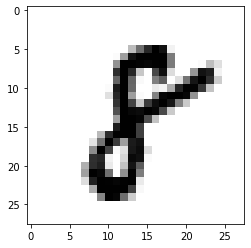

In [7]:
#locating a picture
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

Each digit is present in a 28x28 pixel box. Each pixel, in this grayscale dataset,
contains a value from 0 to 255 indicating the color (in terms of darkness). Thus, each
image is defined by 784 values.

In [8]:
#nn model
model = nn.Sequential(nn.Linear(784, 64),
                      nn.ReLU(),
                      nn.Linear(64,64),
                      nn.ReLU(),
                      nn.Linear(64,10)
                     )

The input layer contains 784 units and the output layer contains 10 units representing decimal digits

In [9]:
model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [10]:
# loss function and optimizer
lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=.01)

In [13]:
losses = []
for epoch in range(10):
    running_loss = 0
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = lossfn(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(train_loader)))
    losses.append(running_loss/len(train_loader))

Epoch 0 - Training loss: 1.7163368785050885
Epoch 1 - Training loss: 0.549147734907009
Epoch 2 - Training loss: 0.3953576859380645
Epoch 3 - Training loss: 0.34881145169517636
Epoch 4 - Training loss: 0.3219700091476761
Epoch 5 - Training loss: 0.30190177312664895
Epoch 6 - Training loss: 0.2846942483536851
Epoch 7 - Training loss: 0.26973898720337763
Epoch 8 - Training loss: 0.2564559022524654
Epoch 9 - Training loss: 0.24367129037391022


**A graph showing reduction of loss over time**

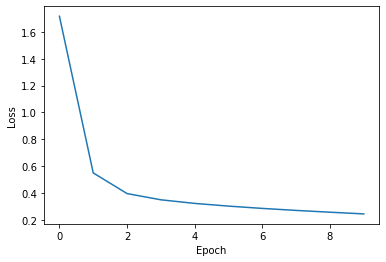

In [14]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

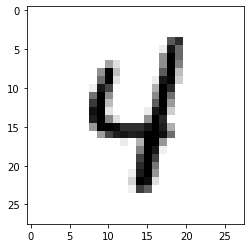

In [16]:
# testing the model
testimgs, testlabels = next(iter(test_loader))
plt.imshow(testimgs[0][0].numpy().squeeze(), cmap='gray_r')

First compressing the image to 1x784 cell format and find the values at the output layer. The highest value would correspond to the predicted value. Also convert the values of output cells to the probabilities, of which, the best can be chosen as the output.

In [17]:
img = testimgs[0].view(1, 784)
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
probabilities = list(ps.numpy()[0])
prediction = probabilities.index(max(probabilities))
prediction

4